## Application of the SVD: The MNIST dataset

The MNIST dataset (MNIST = "Modified National Institute of Standards and Technology") is a large dataset consisting of images of handwritten digits, each of which is grayscale and 28x28 pixels in size. In this notebook, we will calculate the SVD of the entire dataset and have a look at the singular vectors and their interpretation.

Recall that the SVD of a matrix $X$ is given by $X = U \Sigma V^\mathrm{T}$, where $\Sigma$ is a rectangular, diagonal matrix containing the singular values in decreasing order and $U$ and $V$ are orthogonal matrices. The columns of $U$ and $V$ are called the left and right singular vectors, respectively.

Let us begin by loading the MNIST dataset and have a look at some of the images to get an idea how the dataset looks like.

*Reference, especially for the interpretation of the "patterns" below: Stefan Savev, https://stefansavev.com/blog/svd-the-pattern-extraction-view/*

*For questions, suggestions etc., please contact me @ christoph.glanzer@ifor.math.ethz.ch*

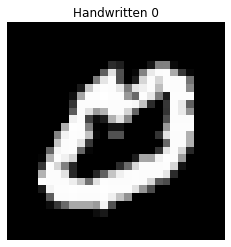

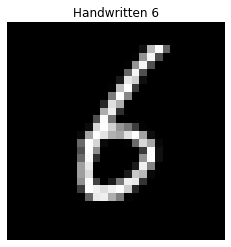

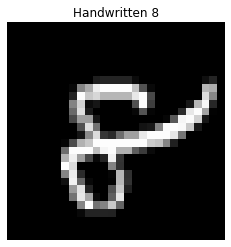

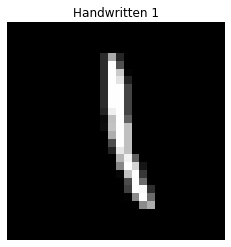

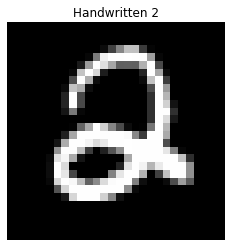

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), _ = mnist.load_data()

X = x_train.reshape(60000,-1)

for i in range(5):
    k = np.random.randint(0,60000)
    plt.figure()
    plt.imshow(X[k,:].reshape(28,28), cmap="gray")
    plt.axis("off")
    plt.title("Handwritten " + str(y_train[k]))

The matrix $X$ contains 60000 images of such handwritten digits. Every row of this matrix corresponds to one image, i.e., the 28x28 pixel values are "stretched" out to a 784-dimensional vector. In other words, $X \in \mathbb{R}^{60000 \times 784}$ which implies that $U \in \mathbb{R}^{60000 \times 60000}$, $\Sigma \in \mathbb{R}^{60000 \times 784}$ and $V^\mathrm{T} \in \mathbb{R}^{784 \times 784}$.

We can interpret the SVD as follows: Every row-vector $u$ of $U$ corresponds to an image which is created by first scaling the entries of $u$ by the singular values and by subsequently multiplying the resulting vector by "patterns", which are given by the row-vectors of $V^\mathrm{T}$. In what follows, we will plot some of these patterns (rescaled to 28x28 images).

The following code calculates the SVD which may take a while to process.

In [2]:
[U,S,V] = np.linalg.svd(X, full_matrices=False)
print("Done!")

Done!


The following plot shows the sizes of the singular values (on the $y$-axis). Only few of them are large.

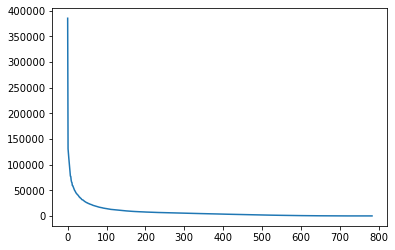

In [3]:
plt.figure()
plt.plot(range(len(S)), S)

Next, we plot the first four patterns encoded in the rows of the matrix $V^T$.

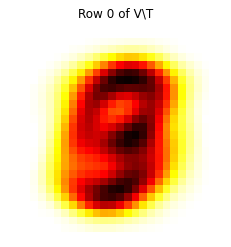

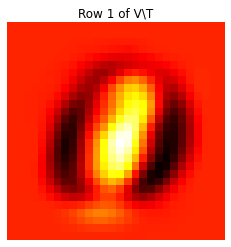

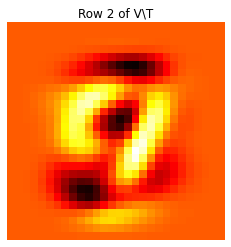

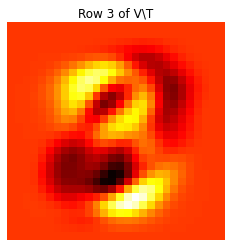

In [4]:
for i in range(4):
    plt.figure()
    plt.imshow(-V[i,:].reshape(28,28), cmap='hot', interpolation='nearest')
    plt.axis("off")
    plt.title("Row " + str(i) + " of V\T")

Every pattern has negative and positive entries. In fact, each image contains two patterns, the one corresponding to the negative entries and the one corresponding to the positive entries.

The first image is the average of all handwritten digits in the dataset. The second image looks like a $0$, but is actually both $0$ and $1$, where the $1$ corresponds to the negative pixel values and the $0$ to the positive pixel values.

Can you find a meaningful interpretation for the others?